/var/folders/0w/8h7fnp0j0hj_97dgbggnqnwc0000gn/T/ipykernel_40438/3538462651.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


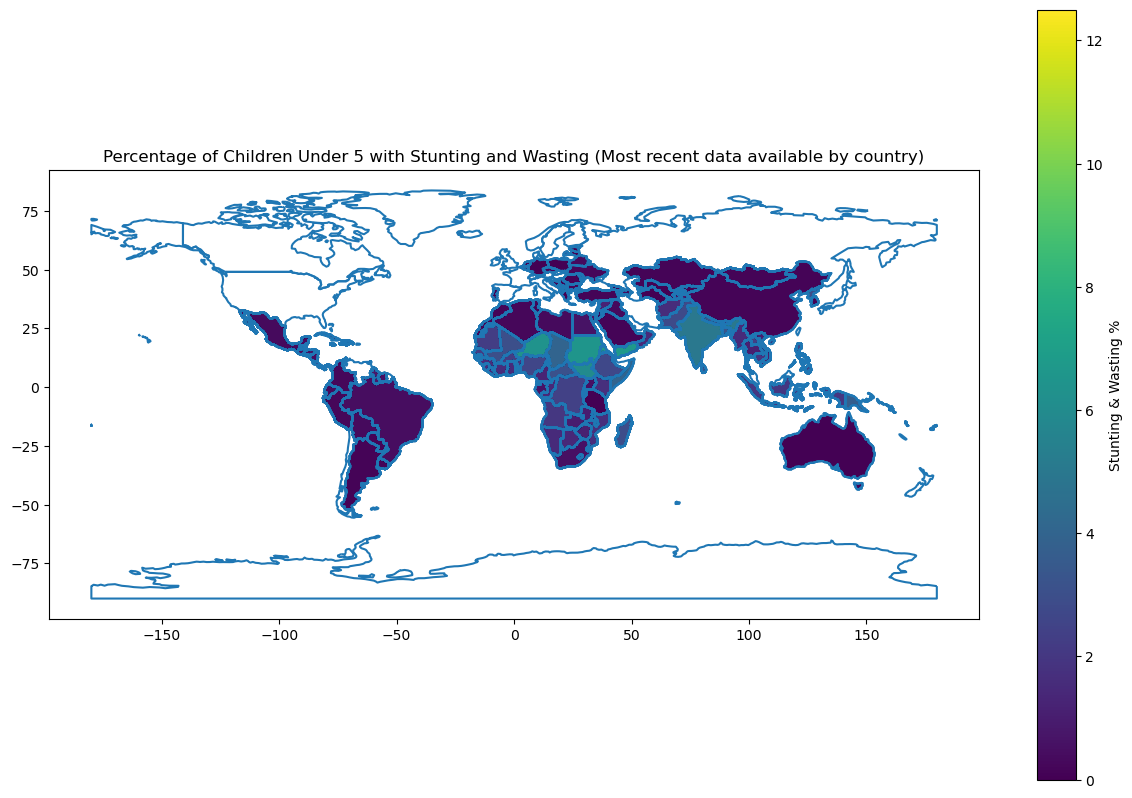

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load world geometry
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Load your data
stunting_data_latest = pd.read_csv("unicef_indicator_2.csv")

# Merge the stunting data with the world geometries
world_data = world.merge(stunting_data_latest, left_on='iso_a3', right_on='alpha_3_code', how='left')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_data.boundary.plot(ax=ax)
world_data.dropna(subset=['obs_value']).plot(column='obs_value', ax=ax, legend=True,
                                            legend_kwds={'label': "Stunting & Wasting %"},
                                            cmap='viridis')
plt.title('Percentage of Children Under 5 with Stunting and Wasting (Most recent data available by country)')
plt.show()


/var/folders/0w/8h7fnp0j0hj_97dgbggnqnwc0000gn/T/ipykernel_40438/3212124710.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indicator_2_clean['time_period'] = pd.to_numeric(indicator_2_clean['time_period'], errors='coerce')


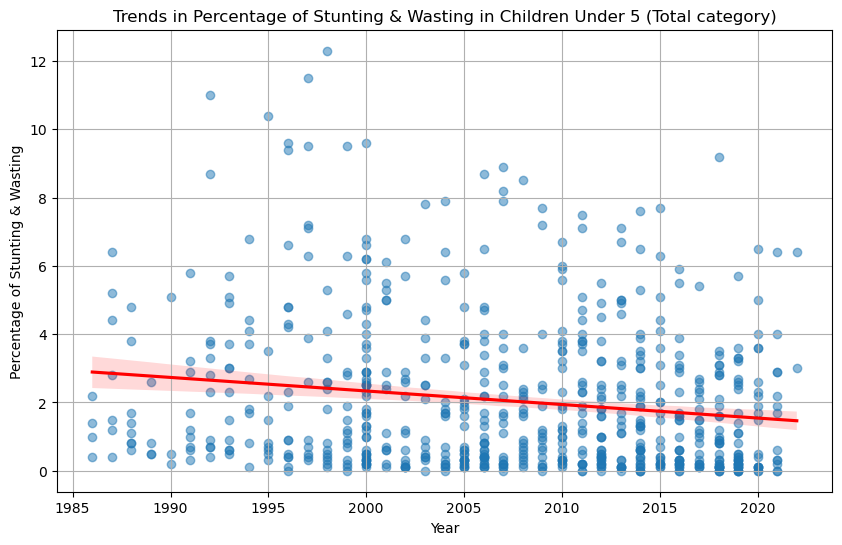

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
indicator_2 = pd.read_csv('unicef_indicator_2.csv')

# Filter the data for the 'Total' category and convert 'time_period' to numeric, ignoring non-numeric entries
indicator_2_clean = indicator_2[indicator_2['sex'] == 'Total']
indicator_2_clean['time_period'] = pd.to_numeric(indicator_2_clean['time_period'], errors='coerce')
indicator_2_clean = indicator_2_clean.dropna(subset=['time_period'])  # Remove any rows where time_period couldn't be converted

# Plotting the scatterplot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='time_period', y='obs_value', data=indicator_2_clean, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Trends in Percentage of Stunting & Wasting in Children Under 5 (Total category)')
plt.xlabel('Year')
plt.ylabel('Percentage of Stunting & Wasting')
plt.grid(True)
plt.show()


/var/folders/0w/8h7fnp0j0hj_97dgbggnqnwc0000gn/T/ipykernel_40438/282775473.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['time_period'] = pd.to_numeric(time_series_data['time_period'], errors='coerce')


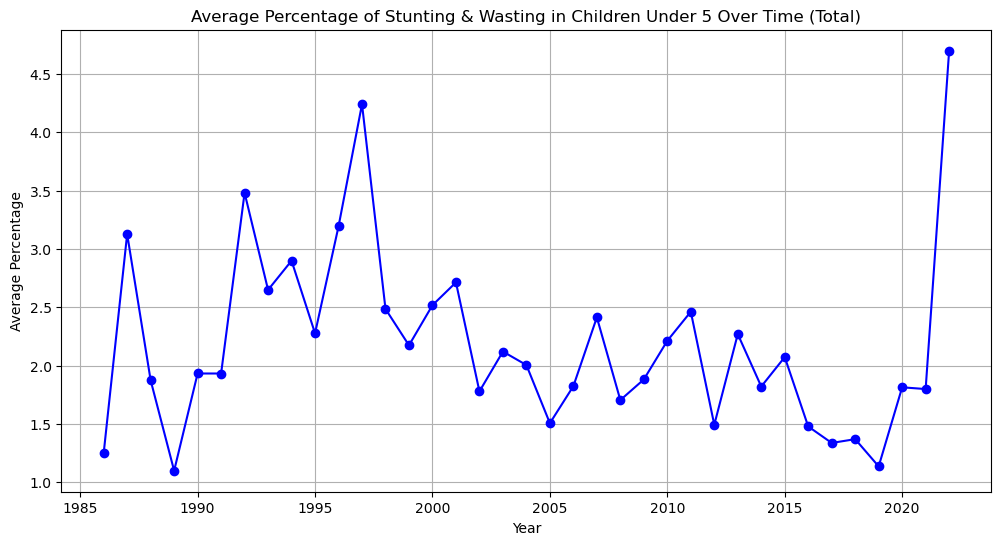

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
indicator_2 = pd.read_csv('unicef_indicator_2.csv')

# Filter and prepare for time-series visualization
time_series_data = indicator_2[(indicator_2['sex'] == 'Total') & (indicator_2['indicator'] == 'Height-for-age <-2SD & Weight-for-height <-2SD')]
time_series_data['time_period'] = pd.to_numeric(time_series_data['time_period'], errors='coerce')
time_series_data = time_series_data.dropna(subset=['time_period'])  # Ensuring all time periods are numeric

# Group by year and calculate the mean of observed values
time_series_grouped = time_series_data.groupby('time_period')['obs_value'].mean().reset_index()

# Plotting the time-series
plt.figure(figsize=(12, 6))
plt.plot(time_series_grouped['time_period'], time_series_grouped['obs_value'], marker='o', linestyle='-', color='blue')
plt.title('Average Percentage of Stunting & Wasting in Children Under 5 Over Time (Total)')
plt.xlabel('Year')
plt.ylabel('Average Percentage')
plt.grid(True)
plt.show()


/var/folders/0w/8h7fnp0j0hj_97dgbggnqnwc0000gn/T/ipykernel_40438/887754411.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series_data['time_period'] = pd.to_numeric(time_series_data['time_period'], errors='coerce')


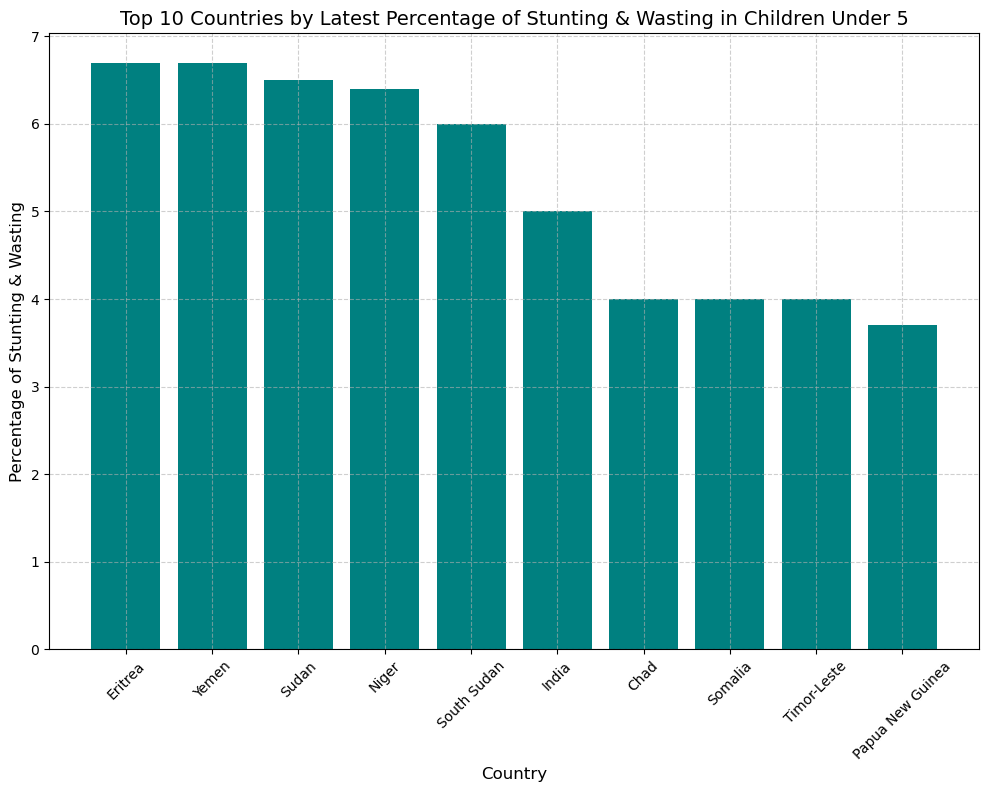

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
indicator_2 = pd.read_csv('unicef_indicator_2.csv')

# Filter data for the 'Total' category and prepare for bar chart visualization
time_series_data = indicator_2[(indicator_2['sex'] == 'Total') & (indicator_2['indicator'] == 'Height-for-age <-2SD & Weight-for-height <-2SD')]
time_series_data['time_period'] = pd.to_numeric(time_series_data['time_period'], errors='coerce')
latest_data_per_country = time_series_data.dropna(subset=['time_period']).sort_values('time_period', ascending=False).drop_duplicates('country')

# Sort data to display the top countries with the highest values
sorted_data = latest_data_per_country.sort_values('obs_value', ascending=False).head(10)  # Top 10 countries

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(sorted_data['country'], sorted_data['obs_value'], color='teal')
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Percentage of Stunting & Wasting', fontsize=12)
ax.set_title('Top 10 Countries by Latest Percentage of Stunting & Wasting in Children Under 5', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
